In [ ]:
#FFKLL FLAAR: k means optimo
#KCESE: distancias
#FF SAA : grado optimo

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [6]:
datos=load_breast_cancer()
X=datos.data
y=datos.target
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [8]:
X=minmax.fit_transform(X)

In [9]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [10]:
from sklearn.model_selection import StratifiedKFold
K=10
skf=StratifiedKFold(n_splits=K)

In [11]:
resultados=pd.DataFrame(columns=["means","entrena","test"])

In [29]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [31]:
for i,k in enumerate(range(2,5)):
    aciertos_entrena=0
    aciertos_verifica=0
    for train_index,test_index in skf.split(X,y):
        kmeans=KMeans(n_clusters=k)
        X_train=X[train_index]
        X_test=X[test_index]
        y_train=y[train_index]
        y_test=y[test_index]
        kmeans.fit(X_train,y_train)
        labels=kmeans.labels_


        
        auxiliar=np.zeros(k)
        for a in range(k):
            similares=(labels==a)
            indices=np.argwhere(similares)
            train_encontrados=y_train[indices]
            auxiliar[a]=(mode(train_encontrados)[0])
        
        aciertos_entrena+=accuracy_score(y_train,auxiliar[kmeans.predict(X_train)])
        aciertos_verifica+=accuracy_score(y_test,auxiliar[kmeans.predict(X_test)])
    resultados.loc[i]=[k,aciertos_entrena/K,aciertos_verifica/K]
            


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_12060\2640415083.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  auxiliar[a]=(mode(train_encontrados)[0])
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the val

In [32]:
resultados

,means,entrena,test
0,2.0,0.927554,0.926222
1,3.0,0.901387,0.905138
2,4.0,0.909977,0.898120


In [33]:
import matplotlib.pyplot as plt

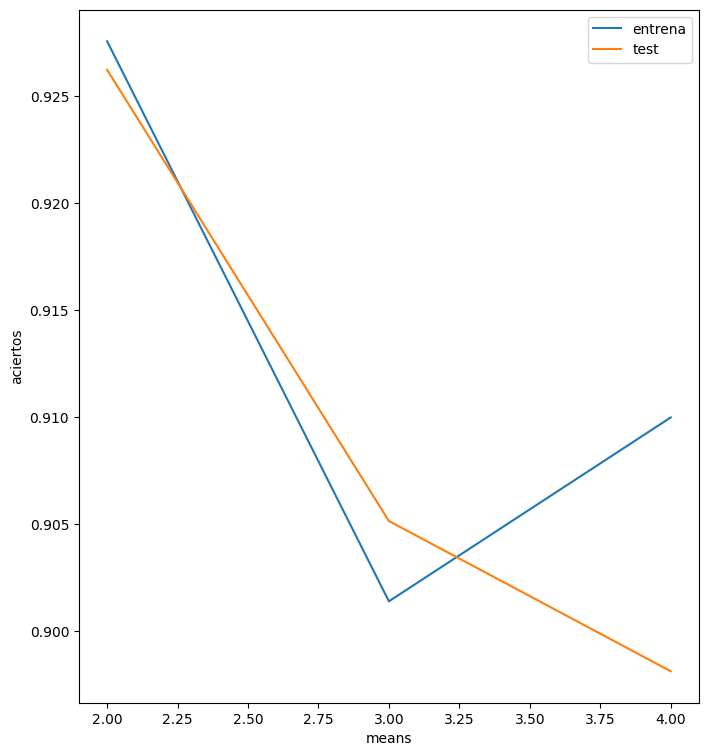

In [36]:
plt.figure(figsize=(8,9))
plt.plot(resultados["means"],resultados["entrena"],label="entrena")
plt.plot(resultados["means"],resultados["test"],label="test")
plt.xlabel("means")
plt.ylabel("aciertos")
plt.legend()
plt.show()

In [39]:
print("maximo;",resultados["test"].max())
optimo=resultados["test"].idxmax()
optimo=resultados.at[optimo,"means"]
print("optimo:",optimo)

maximo; 0.9262218045112782
optimo: 2.0


In [40]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist

In [47]:
kmeans=KMeans(n_clusters=int(optimo))
kmeans.fit(X)
centros=kmeans.cluster_centers_
distancias=euclidean_distances(centros)
sigma=np.sum(distancias,axis=0)/centros.shape[0]-1
sigma
X_svm=np.exp(-cdist(X,centros)**2/(2*(sigma**2)))


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[8.02134216e-02, 3.02992757e-04],
       [3.34165378e-01, 9.02464731e-02],
       [7.23478128e-01, 1.98867811e-02],
       ...,
       [3.39675475e-01, 2.70090448e-01],
       [6.14996081e-02, 5.80673449e-05],
       [1.70316187e-03, 2.47443066e-01]])

In [48]:
resultados_grado=pd.DataFrame(columns=["grado","aciertos"])

In [50]:
from sklearn.svm import SVC

In [53]:
for i,h in enumerate(range(2,5)):
    aciertos=[]
    for train_index,test_index in skf.split(X_svm,y):
        svm=SVC(kernel="poly",degree=h)
        svm.fit(X_svm[train_index],y[train_index])
        aciertos.append(svm.score(X_svm[test_index],y[test_index]))
    media=np.mean(aciertos)
    resultados_grado.loc[i]=[h,media]




In [54]:
resultados

,means,entrena,test
0,2.0,0.927554,0.926222
1,3.0,0.901387,0.905138
2,4.0,0.909977,0.898120
